In [2]:
import random
random.seed(0)

In [3]:
import numpy as np
np.random.seed(0)

In [4]:
import tensorflow as tf
tf.random.set_seed(0)

Importing depedencies


In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

Data Curation
uploading json file from kaggle

In [6]:
kaggle_credentials = json.load(open("kaggle.json"))

In [7]:
#setup kaggle API as env variable
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [8]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [10]:
#unzipping
with ZipFile('plantvillage-dataset.zip','r') as zip:
  zip.extractall()


In [11]:
print(os.listdir('plantvillage dataset'))

['color', 'segmented', 'grayscale']


In [12]:
print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:10])

38
['Grape___Esca_(Black_Measles)', 'Corn_(maize)___healthy', 'Pepper,_bell___healthy', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Tomato___Target_Spot', 'Apple___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Bacterial_spot']


number of classes = 38
#Multiclass classification

In [13]:
print(len(os.listdir('plantvillage dataset/color/Corn_(maize)___healthy')))
print(os.listdir('plantvillage dataset/color/Corn_(maize)___healthy')[:5])

1162
['650d4770-c4b9-4854-8476-681d9d93034c___R.S_HL 5557 copy.jpg', 'f9b74a5f-2ccc-4c11-8472-c5270ddfbee0___R.S_HL 5517 copy 2.jpg', 'fec7d3b4-736b-4d95-92cb-2e8b302f7488___R.S_HL 8306 copy.jpg', 'fdf1ccaa-1464-4159-bb51-5cf5dfb4b3c9___R.S_HL 7902 copy 2.jpg', 'f07047fa-af9d-4f33-afcc-bda603f4c568___R.S_HL 5523 copy 2.jpg']


#data preprocessing

In [14]:
base_dir= 'plantvillage dataset/color'

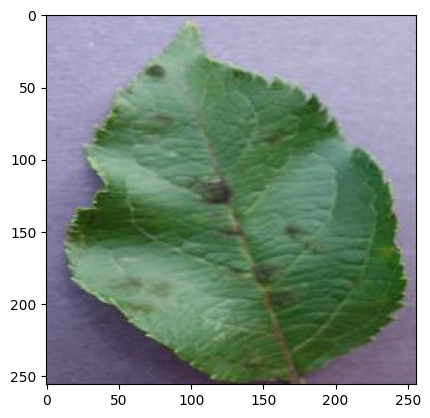

In [15]:
image_path='/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
read_image=mping.imread(image_path)
plt.imshow(read_image)
plt.show()

In [16]:
print(read_image.shape)

(256, 256, 3)


In [17]:
batch_size=32
img_size=224

In [18]:
print(read_image)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


#Train Test Split

In [19]:
#imgae data generators
#use 20% for validation
data_gen= ImageDataGenerator(rescale=1./255,
                          validation_split=0.2)

In [20]:
#train generator
train_generator= data_gen.flow_from_directory(base_dir,
                                             target_size=(img_size,img_size),
                                              batch_size=batch_size,
                                              subset='training')
#validation gennerator
val_generator= data_gen.flow_from_directory(base_dir,
                                             target_size=(img_size,img_size),
                                              batch_size=batch_size,
                                              subset='validation')

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


#Creating Convulutional Neural Network using Tensorflow

In [33]:
model=tf.keras.Sequential([

    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(38,activation='softmax')

])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [35]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#Training the model
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//batch_size, #no of steps per epoch
                  epochs=5,
                  validation_data=val_generator,
                  validation_steps=val_generator.samples//batch_size #validations steps
                  )

Epoch 1/5
1358/1358 [==============================] - 112s 79ms/step - loss: 0.8429 - accuracy: 0.7521 - val_loss: 0.4698 - val_accuracy: 0.8505
Epoch 2/5
1358/1358 [==============================] - 134s 99ms/step - loss: 0.2535 - accuracy: 0.9191 - val_loss: 0.2928 - val_accuracy: 0.9054
Epoch 3/5
1358/1358 [==============================] - 138s 101ms/step - loss: 0.1356 - accuracy: 0.9548 - val_loss: 0.2838 - val_accuracy: 0.9154
Epoch 4/5
1358/1358 [==============================] - 115s 85ms/step - loss: 0.0910 - accuracy: 0.9704 - val_loss: 0.3358 - val_accuracy: 0.9165
Epoch 5/5
1358/1358 [==============================] - 119s 88ms/step - loss: 0.0740 - accuracy: 0.9763 - val_loss: 0.3247 - val_accuracy: 0.9178


#Model Evaluation

In [37]:
val_loss,val_accuracy=model.evaluate(val_generator,steps=val_generator.samples//batch_size)
print(val_loss)
print(val_accuracy)

339/339 [==============================] - 19s 56ms/step - loss: 0.3247 - accuracy: 0.9178
0.3247483968734741
0.9177728891372681


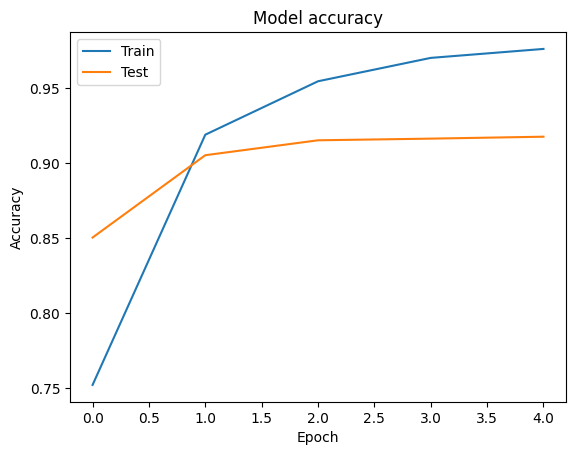

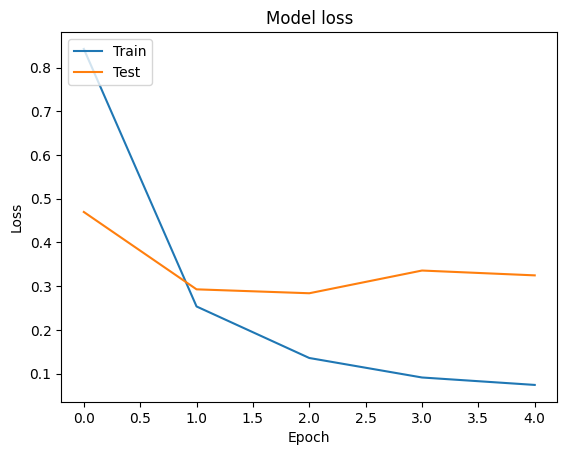

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Prediction

In [40]:
#function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
  img=Image.open(image_path) #load image
  img=img.resize((img_size,img_size)) #resize the image
  img_array=np.array(img) #convert image into numpy array
  img_array=np.expand_dims(img_array,axis=0) #adding batch dimension used for generalization and stabilty during backprop
  img_array=img_array.astype('float32')/255.  #scaling the image values to [0,1]
  return img_array

In [41]:
#function to predict the class of image
def predict_class(mode,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name

In [42]:
#create a mapping from class indices to class names
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [43]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [44]:
#saving te class names as .json file
json.dump(class_indices,open('class_indices.json','w'))

In [48]:
# Example Usage
#test case 1 = apple black rot
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG'
predicted_class_name = predict_class(model, image_path, class_indices)
# Output the result
print("Predicted Class Name:", predicted_class_name)


#test case 1 = potato healthy
image_path = '/content/plantvillage dataset/color/Potato___healthy/0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG'
predicted_class_name = predict_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 17ms/step
Predicted Class Name: Apple___Black_rot
1/1 [==============================] - 0s 17ms/step
Predicted Class Name: Potato___healthy


In [51]:
#save model in drive
model.save('plant_village_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
from google.colab import files
files.download('plant_village_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
model.save('/content/drive/My Drive/my_model.h5')